In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Ayt/Precio vivienda.xlsx', sheet_name='Ponderado')
df.head()

,Cod_dis,Distrito,Nombre,Codigo,Precio Alquiler,Precio Compra
0,1,Centro,PALACIO,11,18.6,4714
1,1,Centro,EMBAJADORES,12,18.8,4231
2,1,Centro,CORTES,13,20.0,5041
3,1,Centro,JUSTICIA,14,20.7,5773
4,1,Centro,UNIVERSIDAD,15,20.0,5144


In [ ]:
df["Precio Alquiler"].unique()

array([18.6, 18.8, 20. , 20.7, 18. , 15. , 16. , 15.9, 15.5, 16.3,  nan,
       15.4, 15.7, 17.7, 19.4, 17.1, 22.8, 16.7, 21.4, 19. , 17.4, 15.6,
       17.5, 15.2, 18.1, 17.8, 19.6, 17.2, 11.1, 13.2, 14.5, 12.1, 12.8,
       12.9, 15.1, 14.1, 12.6, 11.4, 13.5, 10.9, 13.1, 13.3, 12.5, 15.3,
       11.5, 13.6, 12.4, 13.9, 11.9, 13.4, 14.6, 14.7, 13.8, 13. , 12.2,
       11.7, 11.8, 10.7, 12.3, 11.3])

In [ ]:
pairs=df.loc[df["Precio Alquiler"]>0]
missing=df.loc[np.isnan(df["Precio Alquiler"])]

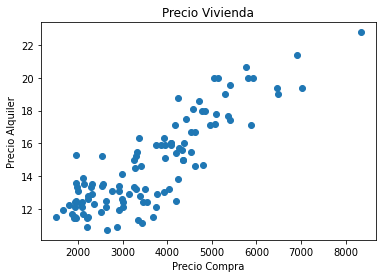

In [ ]:
plt.scatter(pairs["Precio Compra"], pairs["Precio Alquiler"])
plt.title("Precio Vivienda")
plt.xlabel("Precio Compra")
plt.ylabel("Precio Alquiler")
plt.show()

In [ ]:
correlation=np.corrcoef(pairs["Precio Compra"], pairs["Precio Alquiler"])
correlation

array([[1.        , 0.85945132],
       [0.85945132, 1.        ]])

In [ ]:
model = LinearRegression()
model.fit(pairs["Precio Compra"].values.reshape(-1, 1), pairs["Precio Alquiler"])
print("Coefficient of determination:", model.score(pairs["Precio Compra"].values.reshape(-1, 1), pairs["Precio Alquiler"]))
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

Coefficient of determination: 0.7386565655648087
Intercept: 8.37108972678802
Slope: [0.00174662]


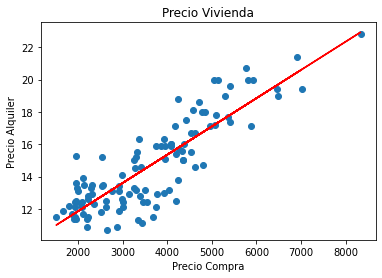

In [ ]:
plt.scatter(pairs["Precio Compra"], pairs["Precio Alquiler"])
plt.plot(pairs["Precio Compra"], model.intercept_+model.coef_*pairs["Precio Compra"], color="red")
plt.title("Precio Vivienda")
plt.xlabel("Precio Compra")
plt.ylabel("Precio Alquiler")
plt.show()

In [ ]:
for missing in range(len(df)):
  if np.isnan(df.iloc[missing]["Precio Alquiler"]):
    value= df.iloc[missing]["Precio Compra"]
    df.loc[missing,"Precio Alquiler"]=np.round(model.predict([[value]]), decimals=1)

In [ ]:
df

,Cod_dis,Distrito,Nombre,Codigo,Precio Alquiler,Precio Compra
0,1,Centro,PALACIO,11,18.6,4714
1,1,Centro,EMBAJADORES,12,18.8,4231
2,1,Centro,CORTES,13,20.0,5041
3,1,Centro,JUSTICIA,14,20.7,5773
4,1,Centro,UNIVERSIDAD,15,20.0,5144
...,...,...,...,...,...,...
126,21,Barajas,ALAMEDA DE OSUNA,211,12.4,3542
127,21,Barajas,AEROPUERTO,212,14.1,3304
128,21,Barajas,CASCO H.BARAJAS,213,12.6,2973
129,21,Barajas,TIMON,214,12.4,3013


In [ ]:
df.to_csv("Precio vivienda.csv")

In [ ]:
pairs["Distrito"].unique()

array(['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartín',
       'Tetuán', 'Chamberí', 'Fuencarral - El Pardo', 'Moncloa - Aravaca',
       'Latina', 'Carabanchel', 'Usera', 'Puente de Vallecas',
       'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
       'Villa de Vallecas', 'Vicálvaro', 'San Blas - Canillejas',
       'Barajas'], dtype=object)

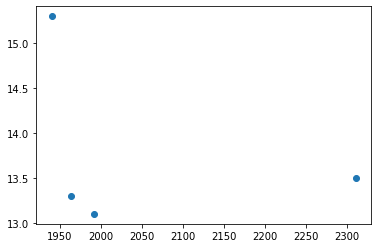

In [ ]:
arganzuela=pairs.loc[pairs["Distrito"]=="Usera"]
plt.scatter(arganzuela["Precio Compra"], arganzuela["Precio Alquiler"])